In [1]:
import SimpleITK as sitk
from subprocess import Popen
import subprocess
import SimpleITK as sitk
import pandas as pd
import multiprocessing as mp
import functools
from functools import partial
import sys
import os.path
from os import path as pathOs
import numpy as np
import tempfile
import shutil
from os.path import basename, dirname, exists, isdir, join, split
from pathlib import Path
import fileinput
import re
import subprocess
from toolz.itertoolz import groupby
import seaborn as sns
import einops
import matplotlib.pyplot as plt
import itertools
import SimpleITK as sitk
import mdai
import pandas as pd
import numpy as np
import cv2
import pydicom
import os
import multiprocessing as mp
import functools
from functools import partial
import mdai
import math
import time
import itertools
from pydicom.fileset import FileSet
from os import path as pathOs
from pathlib import Path
import toolz
from toolz.curried import pipe, map, filter, get
from toolz import curry
from os.path import basename, dirname, exists, isdir, join, split
import nnunetv2

import elastixRegister as elastixRegister
from elastixRegister import reg_a_to_b
import tempfile
import shutil
import re
from toolz.itertoolz import groupby
from toolz import curry
# import multiprocess
# p = multiprocess.Pool(os.cpu_count())
import multiprocessing as mp
import json
import os
from subprocess import Popen
import subprocess
from skimage.segmentation import mark_boundaries
from scipy import ndimage


def copy_changing_type(source, dest):
    image= sitk.ReadImage(source)
    # nan_count=np.sum(np.isnan(np.array(sitk.GetArrayFromImage(image)).flatten()))
    # if(nan_count>0):
    #     raise ValueError(f"!!! nan in {source}")
    image = sitk.DICOMOrient(image, 'LPS')
    image.SetDirection((1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)) 
    image=sitk.Cast(image, sitk.sitkFloat32)
    writer = sitk.ImageFileWriter() 
    writer.SetFileName(dest)
    writer.Execute(image)
    return dest

#metadata directory
resCSVDir='/home/sliceruser/workspaces/konwersjaJsonData/outCsv/resCSV.csv'
#directory with inferred prostates
dir_inferred_prost='/workspaces/konwersjaJsonData/explore/all_prost_segm_full_files/my_prost_infered'
sourceFrame = pd.read_csv(resCSVDir)
test_ids = pd.read_csv('/workspaces/konwersjaJsonData/explore/test_ids.csv' )
new_col_name= 'inferred_pg'




def get_id_from_file_name(path_str):
    path_str=path_str.replace('.nii.gz','')
    path_str=path_str[1:5]
    return int(path_str)

def add_t2w_to_name(source):
    if(source==' '):
        return ' '
    if('t2w' in source):
        return source
    new_path= source.replace('.nii.gz','_t2w.nii.gz')
    copy_changing_type(source, new_path)
    return new_path

def add_inferred_full_prost_to_dataframe(dir_inferred_prost, df,new_col_name):
    """ 
    we have some inferred anatomical segmentations done by previous 
    models now we want to take the folder with 
    """
    list_files= os.listdir(dir_inferred_prost)
    list_files= list(filter(lambda el : el[0]=='9' ,list_files ))
    list_ids= list(map(get_id_from_file_name,list_files))
    list_files= list(map( lambda el: f"{dir_inferred_prost}/{el}" ,list_files))
    file_and_id= dict(list(zip(list_ids,list_files)))
    new_col_dat= list(map( lambda el: file_and_id.get(el,' ') ,df['masterolds'].to_numpy() ))
    #changing path name to mark it is t2w related
    new_col_dat= list(map(add_t2w_to_name,new_col_dat))

    df[new_col_name]=new_col_dat
    return df





FileNotFoundError: [Errno 2] No such file or directory: '/workspaces/konwersjaJsonData/explore/test_ids.csv'

 to_print (163, 159)


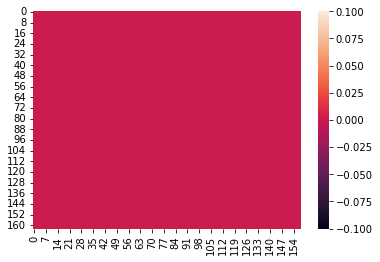

 to_print (163, 159)


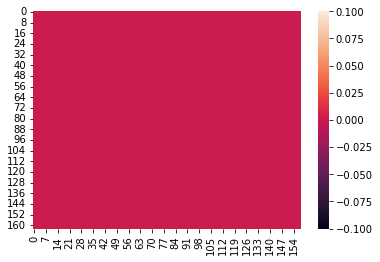

 to_print (163, 159)


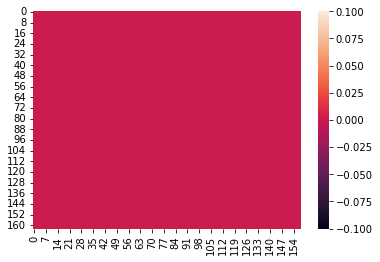

 to_print (163, 159)


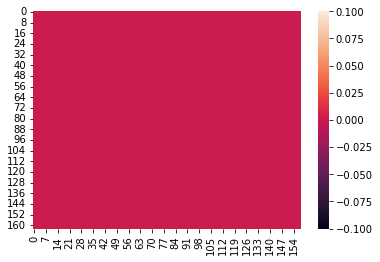

 to_print (163, 159)


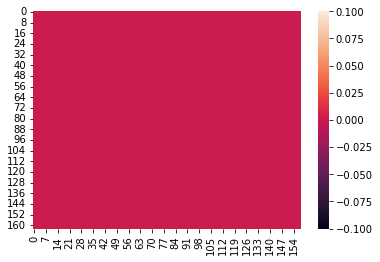

 to_print (163, 159)


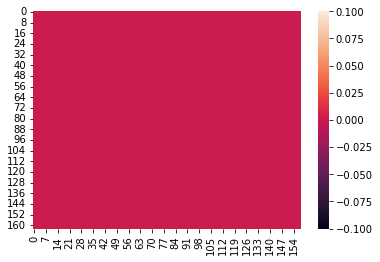

 to_print (163, 159)


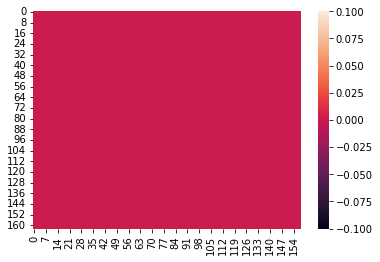

 to_print (163, 159)


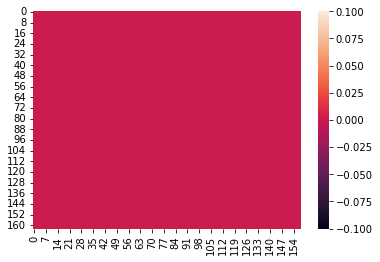

 to_print (163, 159)


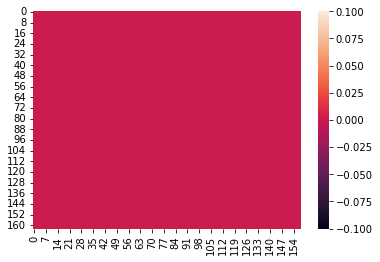

 to_print (163, 159)


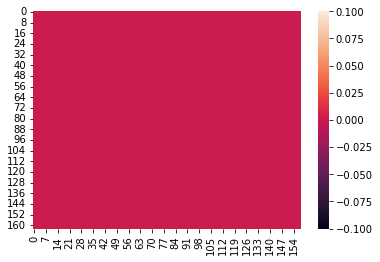

 to_print (163, 159)


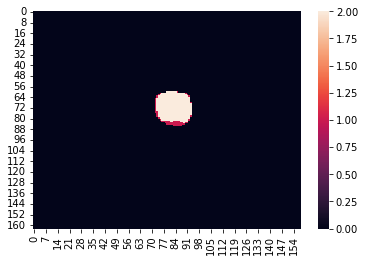

 to_print (163, 159)


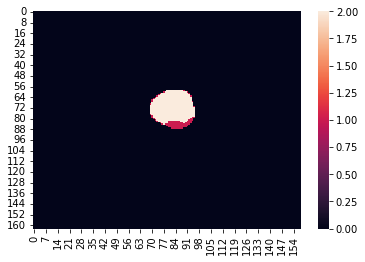

 to_print (163, 159)


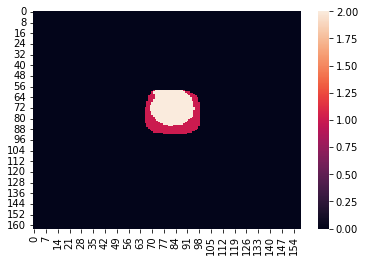

 to_print (163, 159)


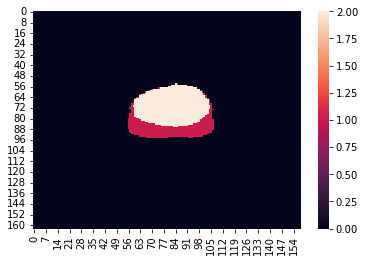

 to_print (163, 159)


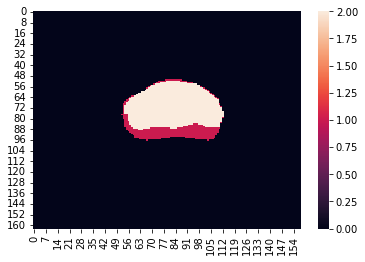

 to_print (163, 159)


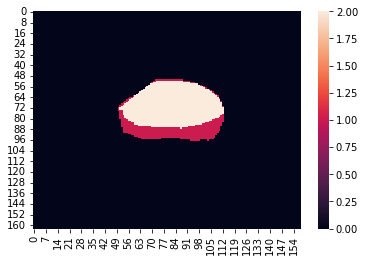

 to_print (163, 159)


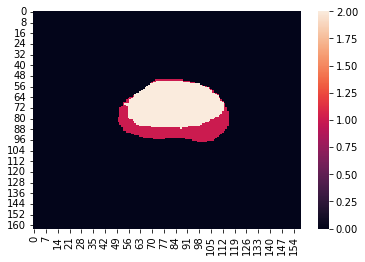

 to_print (163, 159)


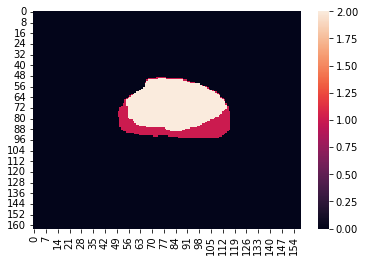

 to_print (163, 159)


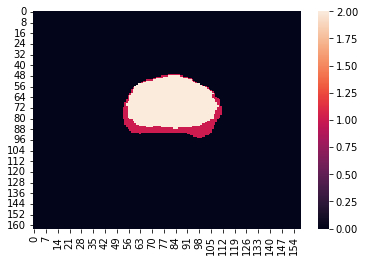

 to_print (163, 159)


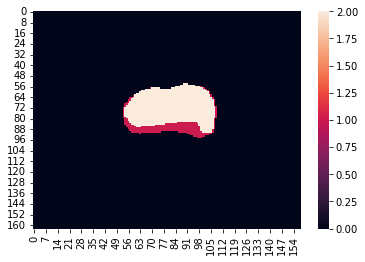

 to_print (163, 159)


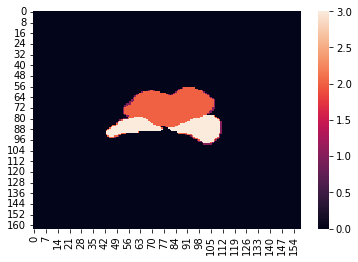

 to_print (163, 159)


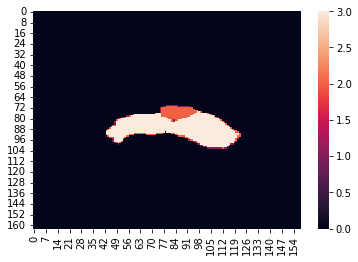

 to_print (163, 159)


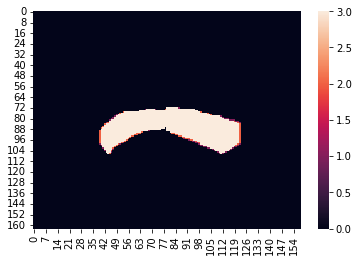

 to_print (163, 159)


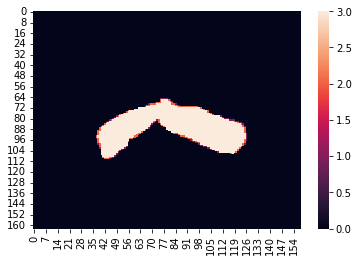

 to_print (163, 159)


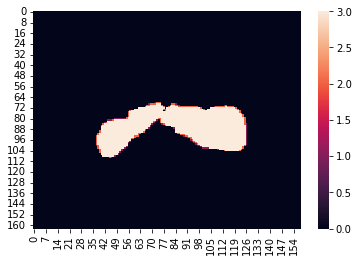

 to_print (163, 159)


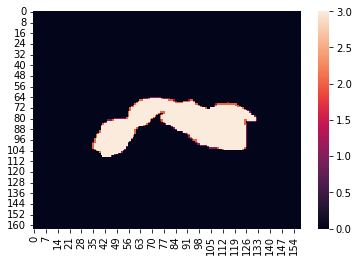

 to_print (163, 159)


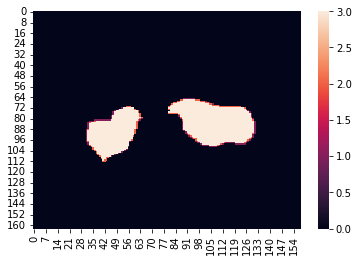

 to_print (163, 159)


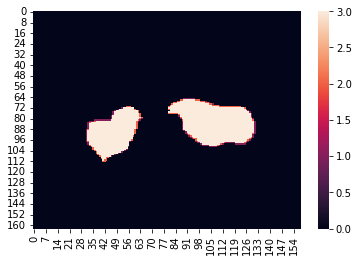

 to_print (163, 159)


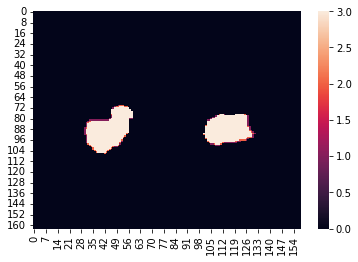

 to_print (163, 159)


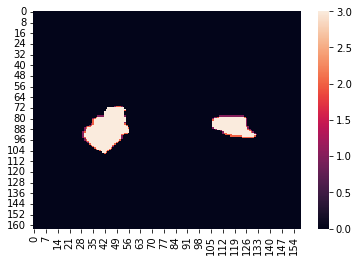

 to_print (163, 159)


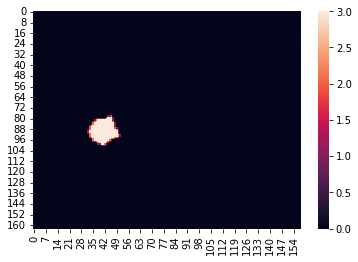

 to_print (163, 159)


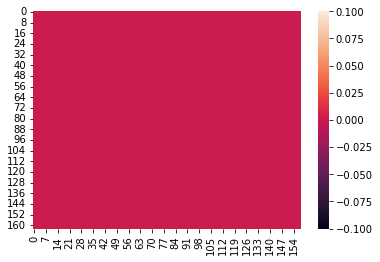

 to_print (163, 159)


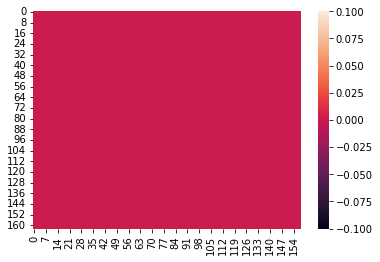

 to_print (163, 159)


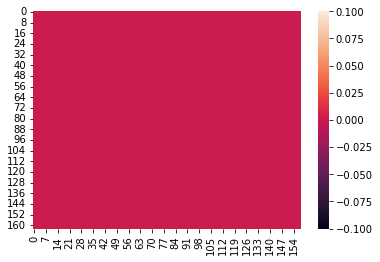

 to_print (163, 159)


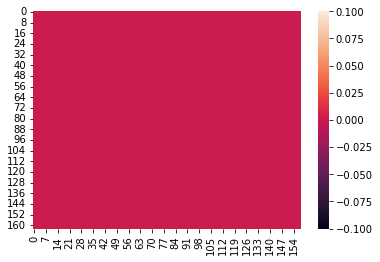

In [13]:
pathh="/home/sliceruser/nnunetMainFolder/nnUNet_preprocessed/Dataset294_Prostate/nnUNetPlans_3d_lowres/9002700_seg.npy"
arr=np.load(pathh)
for i in range(5,40):
    to_print=arr[0,i,:,:]
    print(f" to_print {to_print.shape}")
    sns.heatmap(to_print)
    plt.show()

In [ ]:
import h5py
from mpi4py import MPI
h5_path='/workspaces/konwersjaJsonData/explore/hdf5_loc/mytestfile.hdf5'
f = h5py.File(h5_path, 'r+')#,driver='mpio', comm=MPI.COMM_WORLD


OSError: Unable to open file (file signature not found)

In [1]:
import ctviewer
from ctviewer import CTViewer
# assuming that volumetric_image is the 3-dimensional numpy array
CTViewer(volumetric_image)

In [ ]:

cols=sourceFrame.columns
noSegCols=list(filter(lambda el: '_noSeg' in el , cols))+['series_MRI_path']
lesion_cols=list(filter(lambda el: 'lesion' in el , noSegCols))

sourceFrame=add_inferred_full_prost_to_dataframe(dir_inferred_prost, sourceFrame,new_col_name)

In [ ]:


def groupByMaster(rowws):
    grouped_by_master= groupby(lambda row : row[1]['masterolds'],rowws)
    # grouped_by_master=[(key,list(group)) for key, group in grouped_by_master]
    return dict(grouped_by_master).items()



def get_bool_arr_from_path(pathh):
    """
    given path reads it and return associated array
    then it casts it to boolean data type
    """
    imageA=sitk.ReadImage(pathh)
    return sitk.GetArrayFromImage(imageA).astype(bool)


def getPathsFromRow(row,list_columns):
    """
    extracting all paths of intrest from row
    """
    res=  map( lambda colName : (colName,row[1][colName] ),list_columns )
    return res

def getListModality(modalityName,pathhs,non_mri_inputs):
    """
    getting paths related to single modality and extracting main MRI image
    non_mri_inputs - some inputs that are designed to be put into input channels 
    """
    if(modalityName not in non_mri_inputs):
        # we are intrested only in paths that has the prostate segmentation
        pathhs=list(map(lambda el: el[1],pathhs))
        # pathhs= list(filter(lambda el :"pg_t2w.nii.gz" not in el , pathhs))
        mod_paths = list(filter(lambda pathh :modalityName in  pathh,pathhs))
        mri = list(filter(lambda el: '.mha' in el ,mod_paths))
        if(len(mri)==0):
            return ' ',[]
        mri=mri[0]   
        mod_paths= list(filter(lambda pathh: '.mha' not in pathh , mod_paths))
        return (modalityName,(mri,np.unique(mod_paths).tolist()))
    
    elif(modalityName in non_mri_inputs):
        # colNames=list(map(lambda el: el[0],pathhs))
        pathhss= list(filter(lambda el :modalityName in el[0] , pathhs))   
        if(len(pathhss)==0):
            return ' ',[]        
        res= (modalityName, (modalityName,np.unique(pathhss[0][1]).tolist())  )
        return res


def myFlatten(liist):
    return  itertools.chain(*liist)

def map_modalities(pathhs,modalities,non_mri_inputs):
    all_modalities=modalities+non_mri_inputs
    res= toolz.pipe(all_modalities
                ,map(partial(getListModality,pathhs=pathhs,non_mri_inputs=non_mri_inputs))
                ,list
            )
    # print(f"gggg {res}")
    return res



def iterGroupModalities(groupTuple,modalities_of_intrest,label_cols,non_mri_inputs ):
    """
    grouping the paths into dictionary relative to modalities they represent and lesions on thise 
    modalities
    """
    masterOlds, listRows= groupTuple
    pathhs=toolz.pipe(listRows
                ,map(partial(getPathsFromRow,list_columns=np.unique(label_cols+['series_MRI_path']+non_mri_inputs)))
                ,myFlatten
                # ,filter(lambda el : len(el)>2)
                ,list
                ,partial(map_modalities,modalities=modalities_of_intrest,non_mri_inputs=non_mri_inputs)
                ,dict
                )   
    return (masterOlds,pathhs)



def get_bool_or(pathA,pathB):
    if(isinstance(pathA, str) and isinstance(pathB, str)):
        return np.logical_or(get_bool_arr_from_path(pathA),get_bool_arr_from_path(pathB))
    elif(isinstance(pathA, str) and not isinstance(pathB, str)):
        return np.logical_or(get_bool_arr_from_path(pathA),pathB)
    elif(not isinstance(pathA, str) and isinstance(pathB, str)):
        return np.logical_or(get_bool_arr_from_path(pathB),pathA)
    else:
        return np.logical_or(pathB,pathA)

def get_bool_and(pathA,pathB):
    if(isinstance(pathA, str) and isinstance(pathB, str)):
        return np.logical_and(get_bool_arr_from_path(pathA),get_bool_arr_from_path(pathB))
    elif(isinstance(pathA, str) and not isinstance(pathB, str)):
        return np.logical_and(get_bool_arr_from_path(pathA),pathB)
    elif(not isinstance(pathA, str) and isinstance(pathB, str)):
        return np.logical_and(get_bool_arr_from_path(pathB),pathA)
    else:
        return np.logical_and(pathB,pathA)


def get_4_id(masterolds):
    """
    take master id and changes it into string that starts with 0s and have always length 4
    """
    masteroldsStand=str(masterolds)
    if(len(masteroldsStand)==1):
        return f"000{masteroldsStand}"
    elif(len(masteroldsStand)==2):
        return f"00{masteroldsStand}"
    elif(len(masteroldsStand)==3):
        return f"0{masteroldsStand}"
    return masteroldsStand

def save_from_arr(zeroArray,image3D,newPathLab):
    """
    given array saves it to file into defined path using simpleitk
    """
    writer = sitk.ImageFileWriter()
    image = sitk.GetImageFromArray(zeroArray.astype(float).astype(np.uint8))  
    nan_count=np.sum(np.isnan(np.array(sitk.GetArrayFromImage(image)).flatten()))
    if(nan_count>0):
        raise ValueError(f"!!! nan in image would be saved as {newPathLab}")

    image.SetSpacing(image3D.GetSpacing())
    image.SetOrigin(image3D.GetOrigin())
    image.SetDirection(image3D.GetDirection())   
    image = sitk.DICOMOrient(image, 'LPS')
    image.SetDirection((1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)) 
    writer.SetFileName(newPathLab)
    writer.Execute(image)

def copy_changing_type(source, dest):
    image= sitk.ReadImage(source)
    # nan_count=np.sum(np.isnan(np.array(sitk.GetArrayFromImage(image)).flatten()))
    # if(nan_count>0):
    #     raise ValueError(f"!!! nan in {source}")
    image = sitk.DICOMOrient(image, 'LPS')
    image.SetDirection((1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)) 
    image=sitk.Cast(image, sitk.sitkFloat32)
    writer = sitk.ImageFileWriter() 
    writer.SetFileName(dest)
    writer.Execute(image)
    return dest

# mod="adc"
def get_key_by_value(mod,channel_names):
    return list(channel_names.keys())[list(channel_names.values()).index(mod)]

def prepare_out_paths(group,modalities_of_intrest,labelsTrFolder,imagesTrFolder,non_mri_inputs,channel_names ):
    #preparing names
    for_id=get_4_id(group[0])
    label_new_path= join(labelsTrFolder,f"9{for_id}00.nii.gz" )
    # prostate_path=join(imagesTrFolder,f"9{for_id}00_000{3}.nii.gz" )
    out_pathsDict= list(map( lambda mod:(mod,join(imagesTrFolder,f"9{for_id}00_000{get_key_by_value(mod,channel_names)}.nii.gz" )) ,np.unique(modalities_of_intrest+non_mri_inputs) ))
    out_pathsDict=dict(out_pathsDict)
    return label_new_path,out_pathsDict

# with mp.Pool(processes = mp.cpu_count()) as pool:
# #with mp.Pool(processes = 1) as pool:
#     @curry  
#     def pmap(fun,iterable):
#         return pool.map(fun,iterable)
    
def reg_a_to_b_by_metadata_single_c(fixed_image_path,moving_image_path,interpolator):
    # print(f"fixed_image_path {fixed_image_path} moving_image_path {moving_image_path}")
    # moving_image_path=moving_image_path[0]
    fixed_image=sitk.ReadImage(fixed_image_path)
    moving_image=sitk.ReadImage(moving_image_path)

    # fixed_image=sitk.Cast(fixed_image, sitk.sitkUInt8)
    # moving_image=sitk.Cast(moving_image, sitk.sitkInt)
    
    arr=sitk.GetArrayFromImage(moving_image)
    resampled=sitk.Resample(moving_image, fixed_image, sitk.Transform(3, sitk.sitkIdentity), interpolator, 0)
    return sitk.GetArrayFromImage(resampled)
    
def reg_a_to_b_by_metadata_single_b(fixed_image_path,moving_image_path,out_folder, interpolator=sitk.sitkNearestNeighbor):
    if(len(moving_image_path)<4):
        moving_image_path=moving_image_path[0]
    fixed_image=sitk.ReadImage(fixed_image_path)
    moving_image=sitk.ReadImage(moving_image_path)

    # fixed_image=sitk.Cast(fixed_image, sitk.sitkUInt8)
    # moving_image=sitk.Cast(moving_image, sitk.sitkInt)
    
    arr=sitk.GetArrayFromImage(moving_image)
    resampled=sitk.Resample(moving_image, fixed_image, sitk.Transform(3, sitk.sitkIdentity), interpolator, 0)
    
    # print(f" prim sum {np.sum(sitk.GetArrayFromImage(sitk.ReadImage(moving_image_path)).flatten())} \n suuum {np.sum(sitk.GetArrayFromImage(resampled).flatten())} ")
  
    writer = sitk.ImageFileWriter()
    new_path= join(out_folder,moving_image_path.split('/')[-1])
    writer.SetFileName(new_path)
    writer.Execute(resampled)

    return new_path




In [ ]:

def my_crop(image,min_z,min_y,min_x,max_z,max_x,max_y):
    size=[int(max_y-min_y)-1,int(max_x-min_x)-1,int(max_z-min_z)-1]
    beg=[int(min_y),int(min_x),int(min_z)]
    # size=[int(max_x-min_x)-1,int(max_y-min_y)-1,int(max_z-min_z)-1]
    # beg=[int(min_x), int(min_y),int(min_z)]
    extract = sitk.ExtractImageFilter()
    extract.SetSize(size)
    extract.SetIndex(beg)
    extracted_image = extract.Execute(image)
    return extracted_image

def my_concat(grouped):
    # grouped= list(map(lambda tupl: tupl[1],grouped))
    res=np.stack(grouped).astype(int)
    res=np.sum(res,axis=0)
    return res

def get_from_arr(zeroArray,image3D):
    """
    given array saves it to file into defined path using simpleitk
    """
    image = sitk.GetImageFromArray(zeroArray.astype(float).astype(np.uint8))  
    # nan_count=np.sum(np.isnan(np.array(sitk.GetArrayFromImage(image)).flatten()))
    # if(nan_count>0):
    #     raise ValueError(f"!!! nan in image would be saved as {newPathLab}")

    image.SetSpacing(image3D.GetSpacing())
    image.SetOrigin(image3D.GetOrigin())
    image.SetDirection(image3D.GetDirection())   
    image = sitk.DICOMOrient(image, 'LPS')
    return image


def augment_two_channel(dat_curr,target_curr):
    """
    adding in random spots (but not where already some labels are) lesions that are 
    either low or high on both adc and hbv (they should be high hbv low adc)
    function is not batched
    """
    img_shape= (dat_curr.shape[1],dat_curr.shape[2],dat_curr.shape[3])
    #checked for lesions 
    # #mean adc is 1094.62154301315 stdev 481.980487471925
    #hbv mean 19.4776261112059 std 4.75021004238441
    #for prostate no lesions
    #adc mean 1169.06275422957  std 123.857216768034
    #hbv mean 13.8230222890104  std 3.02186134116448

    gauss_vals=np.array([ [[1094.62154301315,30.0],[13.8230222890104,3.02186134116448 ] ]
                         ,[[1169.06275422957,30.0],[19.4776261112059,4.7502100423844] ] ])
    #n - controlling how big the pseudo lesion will be
    n=np.random.randint(2,5)
    #k - controlling the numebr of pseudo lesions
    k=np.random.randint(0,20) 
    #1) get the target and dilatate it n+1 times (if its sum is above 0)
    target_big= ndimage.binary_dilation((target_curr>0),iterations=n)
    #2) get indicies where dilatated target is still zero and choose random k indicies from it
    target_big=np.argwhere(np.logical_not(target_big))
    rng = np.random.default_rng()
    rng.shuffle(target_big,axis=0)
    target_big=target_big[0:k,:]
    #3) create new zero bool array of original size 
    res_bool= np.zeros(img_shape).astype(bool)
    #4) in a neww array set chosen points to True
    res_bool[target_big[:,0],target_big[:,1],target_big[:,2]]=True
    #5) perform binary dilatation n-1 times and save
    res_bool_a= ndimage.binary_dilation(res_bool,iterations=n-1)
    #6) perform last dilatation - and find indicies that were added in last dilatation
    res_bool_b= ndimage.binary_dilation(res_bool_a,iterations=1)
    diff= np.argwhere(np.logical_and(np.logical_not(res_bool_a), res_bool_b))
    #7) set randomly 60% of them to false so we will have more realistic border
    rng = np.random.default_rng()
    rng.shuffle(diff,axis=0)
    len= diff.shape[0]
    diff=diff[0:len,:]
    res_bool_b[diff[:,0],diff[:,1],diff[:,2]]=False
    #8) we get resulting boolean array calling it res_bool
    res_bool=res_bool_b
    #9) we index image (both channels) with res bool and set it to 0
    data_a=dat_curr[0,:,:,:]
    data_b=dat_curr[1,:,:,:]
    data_a[res_bool]=0
    data_b[res_bool]=0
    # dat_curr=np.stack([data_a,data_b])

    #10) we create new float array of the size like image
    #11) we set it with either mean and variance typical for lesions on hbv or adc and we set the same values 
        # for both channels
    rng = np.random.default_rng()    
    rng.shuffle(gauss_vals,axis=0)
    noise_adc=np.random.normal(gauss_vals[0,0,0], gauss_vals[0,0,1], size=img_shape)
    noise_hbv=np.random.normal(gauss_vals[0,1,0], gauss_vals[0,1,1], size=img_shape)
    #12) we set evrything outside of res_bool to false    
    noise_adc[np.logical_not(res_bool)]=0.0
    noise_hbv[np.logical_not(res_bool)]=0.0
    noise= np.stack([noise_adc,noise_hbv])
    #13)we add image (with zeroad indexes) to array we got in previous step
    dat_curr=np.stack([data_a,data_b])
    dat_curr=dat_curr+noise
    return dat_curr
            #     dat_curr= data[bi,:,:,:,:]
            # target_curr= data[bi,:,:,:]

def visualize_range(group,main_modality,modalities_of_intrest,non_mri_inputs,out_folder):

    modalit_path_add= list(map( lambda el:(group[1][el]) ,non_mri_inputs))
    # print(f"ggg group[1] {group[1]}")
    # print(f"modalit_path_add[0][1] {modalit_path_add[0][1]}")
    if(modalit_path_add[0][1][0]==' '):
        print(f"no prostate! {group[0]}")
        return group[0]

    modalities_of_intrest_without_main= ['hbv']
    # modalities_of_intrest_without_main=non_mri_inputs+modalities_of_intrest_without_main

    sources_dict=group[1]
    sources_dict[non_mri_inputs[0]]=(modalit_path_add[0][1][0],)


    registered_modalities_arrs= list(map(lambda mod: reg_a_to_b_by_metadata_single_c(sources_dict[main_modality][0],sources_dict[mod][0], sitk.sitkBSpline)                                    
                                                      ,modalities_of_intrest_without_main ))
    registered_prostate= list(map(lambda mod: reg_a_to_b_by_metadata_single_c(sources_dict[main_modality][0],sources_dict[mod][0], sitk.sitkNearestNeighbor)                                    
                                                      ,non_mri_inputs ))

    adc_arr=sitk.GetArrayFromImage(sitk.ReadImage(group[1][main_modality][0]))
    prostate_arr= registered_prostate[0]
    hbv_arr= registered_modalities_arrs[0]

    ########### manage labels

    labels_hbv=group[1]['hbv'][1]
    labels_adc=group[1][main_modality][1]




    labels_hbv=list(map(lambda pathh_moving: reg_a_to_b_by_metadata_single_b(sources_dict[main_modality][0],pathh_moving,out_folder,sitk.sitkNearestNeighbor)                                    
                                                      ,labels_hbv ))

    labels= labels_adc+labels_hbv
    labRes= np.zeros_like(adc_arr)
    if(len(labels)>0):

        print(f"labels {labels}")
        label_names=list(map(lambda pathh:  
                            list(filter( lambda el_out:'/' not in el_out ,
                                list(filter(lambda el: 'lesion' in el  ,pathh.split('_')))))[0]
                            
                            ,labels ))

        label_names= list(filter( lambda el: '/' not in el ,label_names))
        # we want to get sum of all labels of the same name - so lesion 1 sum lesion 2 sum ...
        # then we encode it in separate file 
        zipped_names= list(zip(label_names,labels))

        grouped_by_lesion_num = dict(groupby(lambda tupl :tupl[0],zipped_names)).items()
        grouped_by_lesion_num= list(map(lambda grouped :  (grouped[0],list(map(lambda el: el[1],grouped[1])) ) , grouped_by_lesion_num  ))
        # print(f"\n grouped_by_lesion_num {grouped_by_lesion_num} \n")

        # we need to get the paths to bool arrs and sum it all
        # next we keep all >1
        # krowa set it to agreement of 2 annotators
        # print(f"grouped_by_lesion_num {grouped_by_lesion_num}")
        grouped_by_lesion_num_arrs= list(map(lambda grouped : 
                                              list(map(get_bool_arr_from_path, grouped[1]))
                                                ,grouped_by_lesion_num  ))

        grouped_by_lesion_num_arrs= list(map(my_concat,grouped_by_lesion_num_arrs  ))

        grouped_by_lesion_num_arrs= np.stack(grouped_by_lesion_num_arrs,axis=0).astype(int)

        reduced_common= (np.sum(grouped_by_lesion_num_arrs,axis=0)>1).astype(int)

        reduced_sum = np.array(functools.reduce(get_bool_or, labels)).astype(bool)
        reduced_sum= ndimage.binary_dilation(reduced_sum,iterations=3)

        reduced_common_eroded= ndimage.binary_erosion(reduced_common,iterations=1)
        summ=np.sum(reduced_common.flatten())
        if(summ>0):
            ratio=(np.sum(reduced_common_eroded.flatten()) /np.sum(reduced_common.flatten()))
            print(f"ratio {ratio}")
            if(ratio>0.15 ):
                reduced_common=reduced_common_eroded

        reduced_common_eroded= ndimage.binary_erosion(reduced_common,iterations=1)
        if(summ>0):
            ratio=(np.sum(reduced_common_eroded.flatten()) /np.sum(reduced_common.flatten()))
            print(f"ratio {ratio}")
            if(ratio>0.15 ):
                reduced_common=reduced_common_eroded


        print(f"reduced_sum {np.sum(reduced_sum.flatten())}  reduced_common {np.sum(reduced_common.flatten())}")
        labRes=reduced_sum#(reduced_sum>0).astype(int)

        labRes=labRes+(reduced_common.astype(int))
    # label_names=list(map(lambda pathh:  
    #                      list(filter( lambda el_out:'/' not in el_out ,
    #                         list(filter(lambda el: 'lesion' in el  ,pathh.split('_')))))[0]
                         
    #                      ,labels ))
    # label_names= list(filter( lambda el: '/' not in el ,label_names))
    # # we want to get sum of all labels of the same name - so lesion 1 sum lesion 2 sum ...
    # # then we encode it in separate file 
    # zipped_names= list(zip(label_names,labels))

    # grouped_by_lesion_num = dict(groupby(lambda tupl :tupl[0],zipped_names)).items()
    # grouped_by_lesion_num= list(map(lambda grouped :  (grouped[0],list(map(lambda el: el[1],grouped[1])) ) , grouped_by_lesion_num  ))
    # print(f"\n grouped_by_lesion_num {grouped_by_lesion_num} \n")
    # grouped_by_lesion_num_arrs= list(map(lambda grouped :  (grouped[0],np.array(functools.reduce(get_bool_or, grouped[1]))),grouped_by_lesion_num  ))
    # label_names_uniq=list(map(lambda el: el[0] ,grouped_by_lesion_num))
    # label_nums= list(map(lambda name: "".join(list(filter(lambda el:el.isdigit(),name)))  ,label_names_uniq))


    # grouped_by_lesion_num_arrs= list(map(lambda arr ,ndimage.binary_dilation(arr,iterations=1),grouped_by_lesion_num_arrs))







    prostate_arr_indicies= np.argwhere(prostate_arr)



    add_padd_z=50
    add_padd_x=14
    add_padd_y=14

    max_z= np.max(prostate_arr_indicies[:,0])+add_padd_z
    min_z= np.min(prostate_arr_indicies[:,0])-add_padd_z
    # min_z=0
    # max_z=adc_arr.shape[0]
    max_x= np.max(prostate_arr_indicies[:,1])+add_padd_x
    min_x= np.min(prostate_arr_indicies[:,1])-add_padd_x

    max_y= np.max(prostate_arr_indicies[:,2])+add_padd_y
    min_y= np.min(prostate_arr_indicies[:,2])-add_padd_y
    
    min_z=max(min_z,0)
    min_y=max(min_y,0)
    min_x=max(min_x,0)

    max_z=min(max_z,prostate_arr.shape[0]-1)
    max_x=min(max_x,prostate_arr.shape[1]-1)
    max_y=min(max_y,prostate_arr.shape[2]-1)


    # print(f"max_z {max_z} min_z {min_z} max_x {max_x} min_x {min_x} max_y {max_y} min_y {min_y}")

    adc_image = sitk.ReadImage(group[1][main_modality][0])
    hbv_image = get_from_arr(hbv_arr,adc_image)
    label_image = get_from_arr(labRes,adc_image)


    adc_image=my_crop(adc_image,min_z,min_y,min_x,max_z,max_x,max_y)
    hbv_image=my_crop(hbv_image,min_z,min_y,min_x,max_z,max_x,max_y)
    label_image=my_crop(label_image,min_z,min_y,min_x,max_z,max_x,max_y)

    adc_arr=sitk.GetArrayFromImage(adc_image)
    hbv_arr=sitk.GetArrayFromImage(hbv_image)
    labRes=sitk.GetArrayFromImage(label_image)
    # print(f"fffffff adc_arr{adc_arr.shape}  hbv_arr {hbv_arr.shape}")

    stacked =np.stack([adc_arr,hbv_arr])
    # augment_two_channel(dat_curr,target_curr)

    dat=augment_two_channel(stacked,labRes)
    adc_arr=dat[0,:,:,:]
    hbv_arr=dat[1,:,:,:]

    twos=(labRes==2)
    # print(f"aaa adc {np.mean(adc_arr[twos])} hbv {np.mean(hbv_arr[twos])}  ")

    # min_x=0
    # max_x=adc_arr.shape[1]

    # min_y=0
    # max_y=adc_arr.shape[2]

    # adc_arr=adc_arr[min_z:max_z,min_x:max_x,min_y:max_y]
    # hbv_arr=hbv_arr[min_z:max_z,min_x:max_x,min_y:max_y]
    # prostate_arr=prostate_arr[min_z:max_z,min_x:max_x,min_y:max_y]
    # labRes=labRes[min_z:max_z,min_x:max_x,min_y:max_y]
    labRes_bool=labRes>1

    big_prost_z=einops.reduce(labRes_bool,'z x y-> z','sum')
    slice=np.argmax(big_prost_z)

    big_prost_x=einops.reduce(prostate_arr,'z x y-> x','sum')
    on_x=np.argmax(big_prost_z)

    
    prost= prostate_arr[slice,:,:]
    image_to_disp_big= adc_arr[0,:,:]
    image_to_disp_on_x= adc_arr[-1,:,:]
    # mean= np.mean(image_to_disp_big.flatten())
    # std= np.std(image_to_disp_big.flatten())
    # print(f"stddd {std}")
    # # image_to_disp_big= np.clip(image_to_disp_big,mean+1000, mean-1000)
    # image_to_disp_big= np.clip(image_to_disp_big,-10000.0, 100000.0)

    # with_boundaries=mark_boundaries(image_to_disp_big, prost.astype(int) )
    # with_boundaries=mark_boundaries(image_to_disp_big, prost.astype(int) )
    fig, axs = plt.subplots(ncols=3)

    # sns.heatmap(image_to_disp_big,cmap="Greys" ,ax=axs[0])
    # sns.heatmap(image_to_disp_on_x,cmap="Greys" ,ax=axs[1])
    # plt.imshow(with_boundaries)
    sns.heatmap(adc_arr[slice,:,:],cmap="Greys" ,ax=axs[0] )
    sns.heatmap(hbv_arr[slice,:,:],cmap="Greys" ,ax=axs[1] )
    sns.heatmap(labRes[slice,:,:],cmap="Greys" ,ax=axs[2] )
    plt.show()

    # registered_modalities= list(map(lambda mod: reg_a_to_b(join(temp_dir,mod),group[0],group[1][main_modality][0],group[1][mod][0],group[1][mod][1],reg_prop
    #                                                             ,elacticPath,transformix_path,mod)
                        # ,modalities_of_intrest_without_main   ))


KeyboardInterrupt: 

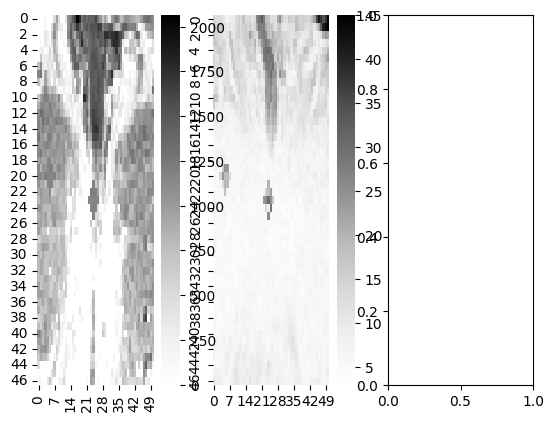

In [15]:

test_ids = pd.read_csv('/workspaces/konwersjaJsonData/explore/test_ids.csv' ).to_numpy().flatten()

test_ids= list(map(lambda el: str(el).strip(),test_ids ))
filter_ids=lambda row: str(row[1]['masterolds']).strip() not in test_ids
modalities_of_intrest=['t2w','adc','hbv']
cols=sourceFrame.columns
noSegCols=list(filter(lambda el: '_noSeg' in el , cols))+['series_MRI_path']
lesion_cols=list(filter(lambda el: 'lesion' in el , noSegCols))
main_modality = 'adc'
non_mri_inputs=[new_col_name]
out_folder='/workspaces/konwersjaJsonData/explore/temp'
# with mp.Pool(processes = mp.cpu_count()) as pool:
# with mp.Pool(processes = 1) as pool:
#     @curry  
#     def pmap(fun,iterable):
#         return pool.map(fun,iterable)

ids=toolz.pipe(sourceFrame.iterrows()
                                ,filter(lambda row: row[1]['series_desc'] in modalities_of_intrest)
                                ,filter(filter_ids) # filter out all of the test cases
                                ,groupByMaster
                                ,map(partial(iterGroupModalities,modalities_of_intrest=modalities_of_intrest,label_cols=lesion_cols,non_mri_inputs=non_mri_inputs))
                                ,filter(lambda group: ' ' not in group[1].keys() )
                                ,list
                                ,map(partial(visualize_range,main_modality=main_modality,modalities_of_intrest=modalities_of_intrest,non_mri_inputs=non_mri_inputs,out_folder=out_folder))                            
                                ,list)



In [ ]:
aa=sourceFrame['masterolds'].to_numpy()
99461 in aa

In [ ]:
# list(filter(lambda idd: str(idd) in list(map(str,test_ids)), ids))
list(filter(lambda idd: int(idd) in list(map(int,test_ids)) , ids))


In [ ]:
# https://github.com/MIC-DKFZ/nnUNet.git
